In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
from torchvision import transforms
import os

import glob
from PIL import Image

In [2]:
torch.__version__

'1.7.1'

In [3]:
torch.cuda.is_available()

True

In [4]:
BATCH_SIZE = 128

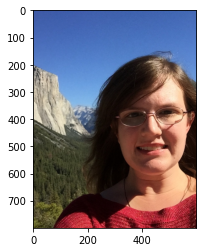

In [5]:
pil_img = Image.open(r'dataset/hk/training/00001.png')
np_img = np.array(pil_img)
plt.imshow(np_img)
plt.show()

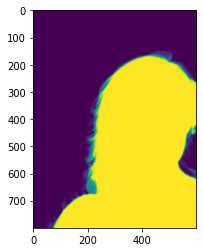

In [6]:
pil_img = Image.open(r'dataset/hk/training/00001_matte.png')
np_img = np.array(pil_img)
plt.imshow(np_img)
plt.show()

In [7]:
np.unique(np_img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
np_img.max(), np_img.min()

(255, 0)

In [9]:
np_img.shape

(800, 600)

In [10]:
all_pics = glob.glob(r'dataset/hk/training/*.png')

In [11]:
all_pics[:5]

['dataset/hk/training\\00001.png',
 'dataset/hk/training\\00001_matte.png',
 'dataset/hk/training\\00002.png',
 'dataset/hk/training\\00002_matte.png',
 'dataset/hk/training\\00003.png']

In [12]:
images = [p for p in all_pics if 'matte' not in p]

In [13]:
len(images)

1700

In [14]:
annotations = [p for p in all_pics if 'matte' in p]

In [15]:
len(annotations)

1700

In [16]:
images[:5]

['dataset/hk/training\\00001.png',
 'dataset/hk/training\\00002.png',
 'dataset/hk/training\\00003.png',
 'dataset/hk/training\\00004.png',
 'dataset/hk/training\\00005.png']

In [17]:
annotations[:5]

['dataset/hk/training\\00001_matte.png',
 'dataset/hk/training\\00002_matte.png',
 'dataset/hk/training\\00003_matte.png',
 'dataset/hk/training\\00004_matte.png',
 'dataset/hk/training\\00005_matte.png']

In [18]:
annotations[-5:]

['dataset/hk/training\\01696_matte.png',
 'dataset/hk/training\\01697_matte.png',
 'dataset/hk/training\\01698_matte.png',
 'dataset/hk/training\\01699_matte.png',
 'dataset/hk/training\\01700_matte.png']

In [19]:
np.random.seed(2021)
index = np.random.permutation(len(images))

In [20]:
images = np.array(images)[index]

In [21]:
images[:5]

array(['dataset/hk/training\\00372.png', 'dataset/hk/training\\01290.png',
       'dataset/hk/training\\00063.png', 'dataset/hk/training\\01131.png',
       'dataset/hk/training\\01126.png'], dtype='<U29')

In [22]:
anno = np.array(annotations)[index]

In [23]:
anno[:5]

array(['dataset/hk/training\\00372_matte.png',
       'dataset/hk/training\\01290_matte.png',
       'dataset/hk/training\\00063_matte.png',
       'dataset/hk/training\\01131_matte.png',
       'dataset/hk/training\\01126_matte.png'], dtype='<U35')

In [24]:
all_test_pics = glob.glob(r'dataset/hk/testing/*.png')

In [25]:
test_images = [p for p in all_test_pics if 'matte' not in p]
test_anno = [p for p in all_test_pics if 'matte' in p]

In [26]:
transform = transforms.Compose([
                    transforms.Resize((256, 256)),
                    transforms.ToTensor(),
])

In [27]:
class Portrait_dataset(data.Dataset):
    def __init__(self, img_paths, anno_paths):
        self.imgs = img_paths
        self.annos = anno_paths
        
    def __getitem__(self, index):
        img = self.imgs[index]
        anno = self.annos[index]
        
        pil_img = Image.open(img)    
        img_tensor = transform(pil_img)
        
        pil_anno = Image.open(anno)    
        anno_tensor = transform(pil_anno)
        anno_tensor = torch.squeeze(anno_tensor).type(torch.long)
        anno_tensor[anno_tensor > 0] = 1
        
        return img_tensor, anno_tensor
    
    def __len__(self):
        return len(self.imgs)

In [28]:
train_dataset = Portrait_dataset(images, anno)

In [29]:
test_dataset = Portrait_dataset(test_images, test_anno)

In [30]:
train_dl = data.DataLoader(
                           train_dataset,
                           batch_size=BATCH_SIZE,
                           shuffle=True,
)

In [31]:
test_dl = data.DataLoader(
                          test_dataset,
                          batch_size=BATCH_SIZE,
)

In [32]:
imgs_batch, annos_batch = next(iter(train_dl))

In [33]:
img = imgs_batch[0].permute(1,2,0).numpy()
anno = annos_batch[0].numpy()

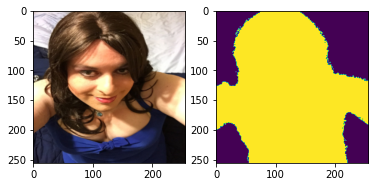

In [34]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(anno)

# 创建 LinkNet 模型

In [35]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, 
                 k_size=3, 
                 stride=1, 
                 pad=1):
        super(ConvBlock, self).__init__()
        self.conv_relu = nn.Sequential(
                            nn.Conv2d(in_channels, out_channels, 
                                      kernel_size=k_size,
                                      stride=stride,
                                      padding=pad),
                            nn.BatchNorm2d(out_channels),
                            nn.ReLU(inplace=True)
            )
    def forward(self, x):
        x = self.conv_relu(x)
        return x

In [36]:
class DeconvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, 
                 k_size=3, 
                 stride=2, 
                 pad=1,
                 padding=1):
        super(DeconvBlock, self).__init__()
        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, 
                                            kernel_size=k_size,
                                            stride=stride,
                                            padding=padding,
                                            output_padding=pad)
        self.bn = nn.BatchNorm2d(out_channels)
            
    def forward(self, x, is_act=True):
        x = self.deconv(x)
        if is_act:
            x = torch.relu(self.bn(x))
        return x

In [37]:
class EncodeBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EncodeBlock, self).__init__()
        self.conv1_1 = ConvBlock(in_channels, out_channels, stride=2)
        self.conv1_2 = ConvBlock(out_channels, out_channels)
        self.conv2_1 = ConvBlock(out_channels, out_channels)
        self.conv2_2 = ConvBlock(out_channels, out_channels)
        self.shortcut = ConvBlock(in_channels, out_channels, stride=2)

    def forward(self, x):
        out1 = self.conv1_1(x)
        out1 = self.conv2_1(out1)
        residue = self.shortcut(x)
        out2 = self.conv2_1(out1 + residue)
        out2 = self.conv2_2(out2)
        return out2 + out1

In [38]:
class DecodeBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DecodeBlock, self).__init__()
        self.conv1 = ConvBlock(in_channels, in_channels//4, 
                               k_size=1, pad=0)
        self.deconv = DeconvBlock(in_channels//4, in_channels//4)
        self.conv2 = ConvBlock(in_channels//4, out_channels, 
                               k_size=1, pad=0)

    def forward(self, x):
        x = self.conv1(x)
        x = self.deconv(x)
        x = self.conv2(x)
        return x

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.init_conv = ConvBlock(3, 64, 
                                   k_size=7, 
                                   stride=2,
                                   pad=3)
        self.init_maxpool = nn.MaxPool2d(kernel_size=(2, 2))
        
        self.encode1 = EncodeBlock(64, 64)
        self.encode2 = EncodeBlock(64, 128)
        self.encode3 = EncodeBlock(128, 256)
        self.encode4 = EncodeBlock(256, 512)
        
        self.decode4 = DecodeBlock(512, 256)
        self.decode3 = DecodeBlock(256, 128)
        self.decode2 = DecodeBlock(128, 64)
        self.decode1 = DecodeBlock(64, 64)
        
        self.deconv_last1 = DeconvBlock(64, 32)
        self.conv_last = ConvBlock(32, 32)
        self.deconv_last2 = DeconvBlock(32, 2, 
                                        k_size=2,
                                        pad=0,
                                        padding=0)
    
    def forward(self, x):
        x = self.init_conv(x)              #  (6, 128, 128, 64)
        x = self.init_maxpool(x)           #  (6, 64, 64, 64)
        
        e1 = self.encode1(x)               #  (6, 32, 32, 64)
        e2 = self.encode2(e1)              #  (6, 16, 16, 128)
        e3 = self.encode3(e2)              #  (6, 8, 8, 256)
        e4 = self.encode4(e3)              #  (6, 4, 4, 512)        
        
        d4 = self.decode4(e4) + e3
        d3 = self.decode3(d4) + e2
        d2 = self.decode2(d3) + e1
        d1 = self.decode1(d2)
        
        f1 = self.deconv_last1(d1)
        f2 = self.conv_last(f1)
        f3 = self.deconv_last2(f2, is_act=False)
        
        return f3

In [40]:
model = Net()

In [41]:
loss_fn = nn.CrossEntropyLoss()

# IOU 指标

In [42]:
from torch.optim import lr_scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [43]:
def fit(epoch, model, trainloader, testloader):
    correct = 0
    total = 0
    running_loss = 0
    epoch_iou = []
    
    model.train()
    for x, y in trainloader:
#        if torch.cuda.is_available():
#            x, y = x.to('cuda'), y.to('cuda')
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
            
            intersection = torch.logical_and(y, y_pred)
            union = torch.logical_or(y, y_pred)
            batch_iou = torch.true_divide(torch.sum(intersection), 
                                          torch.sum(union))
            epoch_iou.append(batch_iou)
            
    exp_lr_scheduler.step()
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / (total*256*256)
        
        
    test_correct = 0
    test_total = 0
    test_running_loss = 0 
    epoch_test_iou = []
    
    model.eval()
    with torch.no_grad():
        for x, y in testloader:
#            if torch.cuda.is_available():
#                x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()

            # 预测结果与真实值的交集(与运算)
            intersection = torch.logical_and(y, y_pred)
            # 预测结果与真实值的并集(或运算)
            union = torch.logical_or(y, y_pred)
            # 一个批次batch的iou = 交集 / 并集，利用torch.true_divide实现tensor之间的除法
            batch_iou = torch.true_divide(torch.sum(intersection), 
                                          torch.sum(union))
            epoch_test_iou.append(batch_iou)
            
    
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / (test_total*256*256)
    
        
    print('epoch: ', epoch, 
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'IOU:', round(np.mean(epoch_iou), 3))
    print()
    print('     ', 'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3),
           'test_iou:', round(np.mean(epoch_test_iou), 3)
             )
        
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [44]:
epochs = 40

In [45]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model,
                                                                 train_dl,
                                                                 test_dl)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch:  0 loss：  0.005 accuracy: 0.677 IOU: 0.536

      test_loss：  0.007 test_accuracy: 0.566 test_iou: 0.548
epoch:  1 loss：  0.003 accuracy: 0.851 IOU: 0.77

      test_loss：  0.006 test_accuracy: 0.678 test_iou: 0.595
epoch:  2 loss：  0.002 accuracy: 0.887 IOU: 0.816

      test_loss：  0.004 test_accuracy: 0.837 test_iou: 0.75
epoch:  3 loss：  0.002 accuracy: 0.906 IOU: 0.844

      test_loss：  0.003 test_accuracy: 0.869 test_iou: 0.796
epoch:  4 loss：  0.002 accuracy: 0.916 IOU: 0.858

      test_loss：  0.004 test_accuracy: 0.829 test_iou: 0.749
epoch:  5 loss：  0.002 accuracy: 0.925 IOU: 0.873

      test_loss：  0.003 test_accuracy: 0.898 test_iou: 0.84
epoch:  6 loss：  0.002 accuracy: 0.926 IOU: 0.875

      test_loss：  0.003 test_accuracy: 0.886 test_iou: 0.817
epoch:  7 loss：  0.001 accuracy: 0.936 IOU: 0.892

      test_loss：  0.002 test_accuracy: 0.912 test_iou: 0.851
epoch:  8 loss：  0.001 accuracy: 0.943 IOU: 0.903

      test_loss：  0.002 test_accuracy: 0.911 test_iou: 0

# 保存模型

In [46]:
PATH = 'linknet_model.pth'

In [47]:
torch.save(model.state_dict(), PATH)

# 测试模型

In [48]:
my_model = Net()

In [49]:
my_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [50]:
num=3

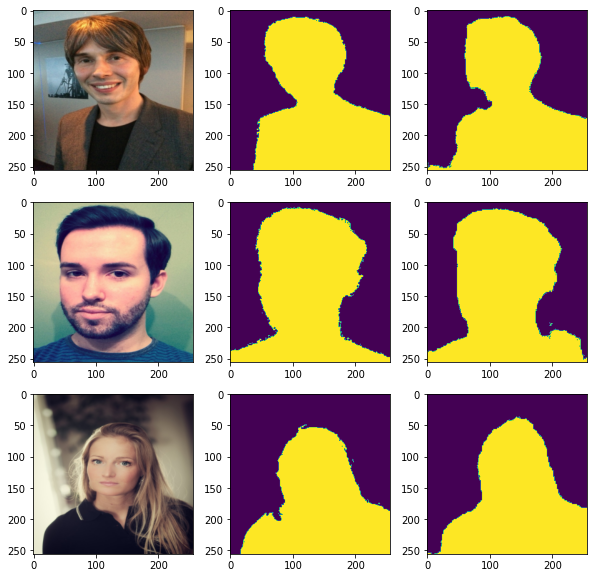

In [51]:
image, mask = next(iter(test_dl))
pred_mask = my_model(image)

plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    plt.imshow(mask[i].cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())

# 在train数据上测试

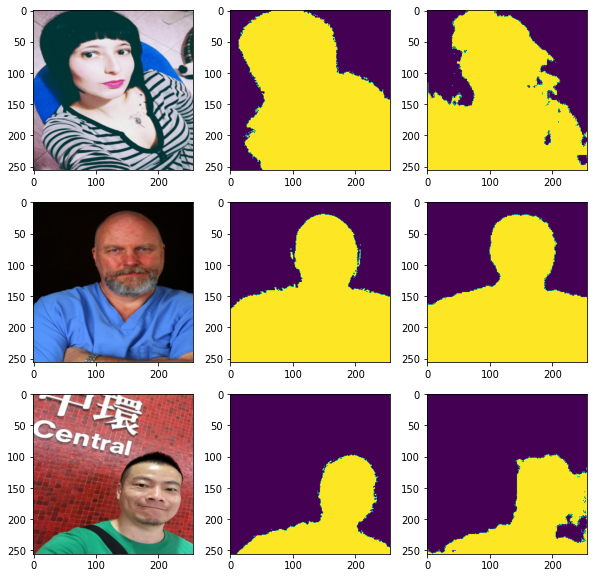

In [52]:
image, mask = next(iter(train_dl))
pred_mask = my_model(image)

plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    plt.imshow(mask[i].cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())